# Libreria 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#parsear XML
import csv   
from lxml import etree
#Parsear HTML
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4.builder import HTMLParserTreeBuilder
#para medir tiempo
from time import time 
import time

# Carga de Archivos XML

In [2]:
org = 'mmu'
ORGANISM = org
maxi ='01040'

pathways = requests.get('http://rest.kegg.jp/list/pathway/' + ORGANISM)  #lista de las vias metabolicas y otra informacion porpocionada por KEGG

for line in pathways.text.split('\n'):         # Se recorre la lista propocionada por  KEGG donde se estraen los nombres de las vias de KEGG
      pathwayid = line.split('\t')[0].replace('path:', '') 
      A = pathwayid+'.xml'                     # Le ponemos la extencion .xml para poder cargar los archivos
      if A == str(org)+str(maxi)+'.xml':           
            break
      locals()[str(pathwayid)] = etree.parse(A) # Guarda los  XML com el nombre de la via asignado por KEGG
      locals()[str(pathwayid)] = locals()[str(pathwayid)].getroot()  # Para transformar todos lo XML en directorios de python

## ARMANDO BASE DE DATOS CON PANDAS

##### crear archivo csv para guardar los datos. 

In [4]:
#data= pd.DataFrame(columns=('n', 'enzima', 'gen', 'nob_Keeg', 'path' ,'link')) # Crear tabla csv. 
#data.to_csv('data_'+org+'.csv', sep=';')                              

In [24]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)
print(save)

2682


In [19]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid ==  str(org)+str(maxi):           
            break
    
    ii=locals()[str(pathwayid)]
    
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'gene':
                n=1+n
                
                if n > save:
                    
                    url = A['link']
                
                    response = requests.get(url)
                    soup = BeautifulSoup(response.text, "html.parser")
                    
                    gen    = soup.html.body.div.table.form.td.table.find_all('td')[3].find_all('div')[0].text.replace('\n', ' ').strip().split()[0].replace(',','')
                    
                    if gen == '(RefSeq)':
                        ll=6
                    else:
                        ll=7
                    
                    enzima = soup.html.body.div.table.form.td.table.find_all('td')[ll].text.strip()
                    
                    NewDat = [n , A['id'] , enzima, gen , A['name'].split( )[0] , pathwayid , A['link'] ]
                
                                
                    with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                        writer = csv.writer(f,delimiter=';')
                        writer.writerow(NewDat)
                                              


In [21]:

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
  
    ii=locals()[str(pathwayid)]
    
        
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'group':
                n=1+n 
                
                NewDat = [n , A['id'] , 'undefined_Enzima'+pathwayid , 'none' ,  A['name'] , pathwayid , 'no link']
                
                        
                with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                    writer = csv.writer(f , delimiter=';')
                    writer.writerow(NewDat)            
           
                          

In [28]:
data=pd.read_csv('data_'+org+'.csv',index_col=0, sep=';')
data=data[['n' ,'enzima', 'nob_Keeg' ,'path']]
data=data.values
data

array([["'18'", 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'mmu:11674', 'mmu00010'],
       ['18', 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'mmu:11674', 'mmu00010'],
       ['42',
        'aldehyde dehydrogenase family 7 member A1 [EC:1.2.1.31 1.2.1.8 1.2.1.3]',
        'mmu:110695', 'mmu00010'],
       ...,
       ['72', 'undefined_Enzimammu00563', 'undefined', 'mmu00563'],
       ['73', 'undefined_Enzimammu00563', 'undefined', 'mmu00563'],
       ['74', 'undefined_Enzimammu00563', 'undefined', 'mmu00563']],
      dtype=object)

In [29]:
for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
    
    locals()['NODES_'+str(pathwayid)]={}
    
    for i in data:
        if i[3] == pathwayid:
            locals()['NODES_'+str(pathwayid)][i[0]]= i[1] 
            print(i[0],i[1], i[2], i[3])
    

'18' fructose-bisphosphate aldolase, class I [EC:4.1.2.13] mmu:11674 mmu00010
18 fructose-bisphosphate aldolase, class I [EC:4.1.2.13] mmu:11674 mmu00010
42 aldehyde dehydrogenase family 7 member A1 [EC:1.2.1.31 1.2.1.8 1.2.1.3] mmu:110695 mmu00010
44 aldehyde dehydrogenase (NAD(P)+) [EC:1.2.1.5] mmu:11670 mmu00010
49 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] mmu:58810 mmu00010
50 alcohol dehydrogenase 1/7 [EC:1.1.1.1] mmu:11522 mmu00010
52 pyruvate dehydrogenase E1 component alpha subunit [EC:1.2.4.1] mmu:18597 mmu00010
53 pyruvate dehydrogenase E1 component alpha subunit [EC:1.2.4.1] mmu:18597 mmu00010
54 pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12] mmu:235339 mmu00010
55 L-lactate dehydrogenase [EC:1.1.1.27] mmu:106557 mmu00010
57 pyruvate kinase [EC:2.7.1.40] mmu:18746 mmu00010
59 enolase [EC:4.2.1.11] mmu:13806 mmu00010
60 bisphosphoglycerate/phosphoglycerate mutase [EC:5.4.2.4 5.4.2.11] mmu:12183 mmu00010
61 glyceraldehyde 3-phosphate de

195 F-type H+-transporting ATPase subunit e mmu:11958 mmu00190
196 F-type H+-transporting ATPase subunit 6 mmu:11957 mmu00190
197 F-type H+-transporting ATPase subunit f mmu:57423 mmu00190
198 F-type H+-transporting ATPase subunit 8 mmu:17706 mmu00190
199 F-type H+-transporting ATPase subunit d mmu:71679 mmu00190
201 F-type H+-transporting ATPase subunit g mmu:27425 mmu00190
210 V-type H+-transporting ATPase subunit A [EC:7.1.2.2] mmu:11964 mmu00190
211 V-type H+-transporting ATPase subunit B mmu:110935 mmu00190
212 V-type H+-transporting ATPase subunit C mmu:66335 mmu00190
213 V-type H+-transporting ATPase subunit D mmu:73834 mmu00190
214 V-type H+-transporting ATPase subunit E mmu:11973 mmu00190
215 V-type H+-transporting ATPase subunit F mmu:66144 mmu00190
216 V-type H+-transporting ATPase subunit G mmu:338375 mmu00190
217 V-type H+-transporting ATPase subunit H mmu:108664 mmu00190
218 V-type H+-transporting ATPase subunit a mmu:11975 mmu00190
219 V-type H+-transporting ATPase subun

54 gamma-glutamyltranspeptidase / glutathione hydrolase / leukotriene-C4 hydrolase [EC:2.3.2.2 3.4.19.13 3.4.19.14] mmu:14598 mmu00480
55 aminopeptidase N [EC:3.4.11.2] mmu:16790 mmu00480
56 5-oxoprolinase (ATP-hydrolysing) [EC:3.5.2.9] mmu:75475 mmu00480
57 gamma-glutamylcyclotransferase [EC:4.3.2.9] mmu:110175 mmu00480
58 gamma-glutamyltranspeptidase / glutathione hydrolase / leukotriene-C4 hydrolase [EC:2.3.2.2 3.4.19.13 3.4.19.14] mmu:14598 mmu00480
59 gamma-glutamylcyclotransferase [EC:4.3.2.9] mmu:110175 mmu00480
60 N-acetyltransferase 8 [EC:2.3.1.80 2.3.1.-] mmu:100043497 mmu00480
61 glutathione S-transferase [EC:2.5.1.18] mmu:103140 mmu00480
95 glutathione reductase (NADPH) [EC:1.8.1.7] mmu:14782 mmu00480
145 6-phosphogluconate dehydrogenase [EC:1.1.1.44 1.1.1.343] mmu:110208 mmu00480
146 ornithine decarboxylase [EC:4.1.1.17] mmu:18263 mmu00480
147 spermidine synthase [EC:2.5.1.16] mmu:20810 mmu00480
152 spermine synthase [EC:2.5.1.22] mmu:20603 mmu00480
155 spermidine synthase

102 phospholipase D3/4 [EC:3.1.4.4] mmu:104759 mmu00564
105 secretory phospholipase A2 [EC:3.1.1.4] mmu:18778 mmu00564
106 lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-] mmu:218121 mmu00564
107 CDP-diacylglycerol--inositol 3-phosphatidyltransferase [EC:2.7.8.11] mmu:52858 mmu00564
111 HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4] mmu:225845 mmu00564
112 phosphoethanolamine/phosphocholine phosphatase [EC:3.1.3.75] mmu:237928 mmu00564
114 glycerol-3-phosphate O-acyltransferase 3/4 [EC:2.3.1.15] mmu:102247 mmu00564
115 glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8] mmu:14555 mmu00564
117 glycerol-3-phosphate dehydrogenase [EC:1.1.5.3] mmu:14571 mmu00564
118 lecithin-cholesterol acyltransferase [EC:2.3.1.43] mmu:16816 mmu00564
121 glycerophosphocholine phosphodiesterase GPCPD1 [EC:3.1.4.2] mmu:74182 mmu00564
123 ethanolaminephosphotransferase [EC:2.7.8.1] mmu:28042 mmu00564
124 lysophospholipase I [EC:3.1.1.5] mmu:18777 mmu00564
127 lysophospholipid acyltransferase 5 [EC

90 thiosulfate/3-mercaptopyruvate sulfurtransferase [EC:2.8.1.1 2.8.1.2] mmu:22117 mmu00920
151 3'-phosphoadenosine 5'-phosphosulfate synthase [EC:2.7.7.4 2.7.1.25] mmu:23971 mmu00920
152 3'-phosphoadenosine 5'-phosphosulfate synthase [EC:2.7.7.4 2.7.1.25] mmu:23971 mmu00920
202 eukaryotic sulfide quinone oxidoreductase [EC:1.8.5.8] mmu:59010 mmu00920
204 sulfur dioxygenase [EC:1.13.11.18] mmu:66071 mmu00920
24 isoleucyl-tRNA synthetase [EC:6.1.1.5] mmu:105148 mmu00970
58 asparaginyl-tRNA synthetase [EC:6.1.1.22] mmu:244141 mmu00970
59 histidyl-tRNA synthetase [EC:6.1.1.21] mmu:15115 mmu00970
60 phenylalanyl-tRNA synthetase beta chain [EC:6.1.1.20] mmu:23874 mmu00970
61 arginyl-tRNA synthetase [EC:6.1.1.19] mmu:104458 mmu00970
62 glutaminyl-tRNA synthetase [EC:6.1.1.18] mmu:97541 mmu00970
63 cysteinyl-tRNA synthetase [EC:6.1.1.16] mmu:27267 mmu00970
64 glycyl-tRNA synthetase [EC:6.1.1.14] mmu:353172 mmu00970
65 aspartyl-tRNA synthetase [EC:6.1.1.12] mmu:226414 mmu00970
66 seryl-tRNA sy

In [31]:
NODES_mmu00010

{"'18'": 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '18': 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '42': 'aldehyde dehydrogenase family 7 member A1 [EC:1.2.1.31 1.2.1.8 1.2.1.3]',
 '44': 'aldehyde dehydrogenase (NAD(P)+) [EC:1.2.1.5]',
 '49': 'alcohol dehydrogenase (NADP+) [EC:1.1.1.2]',
 '50': 'alcohol dehydrogenase 1/7 [EC:1.1.1.1]',
 '52': 'pyruvate dehydrogenase E1 component alpha subunit [EC:1.2.4.1]',
 '53': 'pyruvate dehydrogenase E1 component alpha subunit [EC:1.2.4.1]',
 '54': 'pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]',
 '55': 'L-lactate dehydrogenase [EC:1.1.1.27]',
 '57': 'pyruvate kinase [EC:2.7.1.40]',
 '59': 'enolase [EC:4.2.1.11]',
 '60': 'bisphosphoglycerate/phosphoglycerate mutase [EC:5.4.2.4 5.4.2.11]',
 '61': 'glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12]',
 '62': 'triosephosphate isomerase (TIM) [EC:5.3.1.1]',
 '63': '6-phosphofructokinase 1 [EC:2.7.1.11]',
 '64': 'fructose-1,6-bi

## PRIMERA RED

In [32]:
EDGES=[]

for line in pathways.text.split('\n'):        
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
    ii=locals()[str(pathwayid)]
    
    NODES=locals()['NODES_'+str(pathwayid)]
   
    for i in range(0,len(ii)):
        if ii[i].tag=='relation':         
            A=ii[i].attrib            
            if A['type'] == 'ECrel':    #relación enzima-enzima, que indica dos enzimas que catalizan pasos de reacción sucesivos
                
                EDGES.append( [  NODES[ A['entry1'] ] , NODES[ A['entry2'] ]  ]  ) 

print(EDGES)                

[['aldose 1-epimerase [EC:5.1.3.3]', 'hexokinase [EC:2.7.1.1]'], ['aldose 1-epimerase [EC:5.1.3.3]', 'glucokinase [EC:2.7.1.2]'], ['aldose 1-epimerase [EC:5.1.3.3]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucokinase [EC:2.7.1.2]', 'aldose 1-epimerase [EC:5.1.3.3]'], ['hexokinase [EC:2.7.1.1]', 'aldose 1-epimerase [EC:5.1.3.3]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucokinase [EC:2.7.1.2]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'hexokinase [EC:2.7.1.1]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['phosphoglucomutase / phosphopentomutase [EC:5.4.2.2 5.4.2.7]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'hexokinase [EC:2.7.1.1]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucokinase [EC:2.7.1.2]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'phosphoglucomutase / phosphopentomutase 

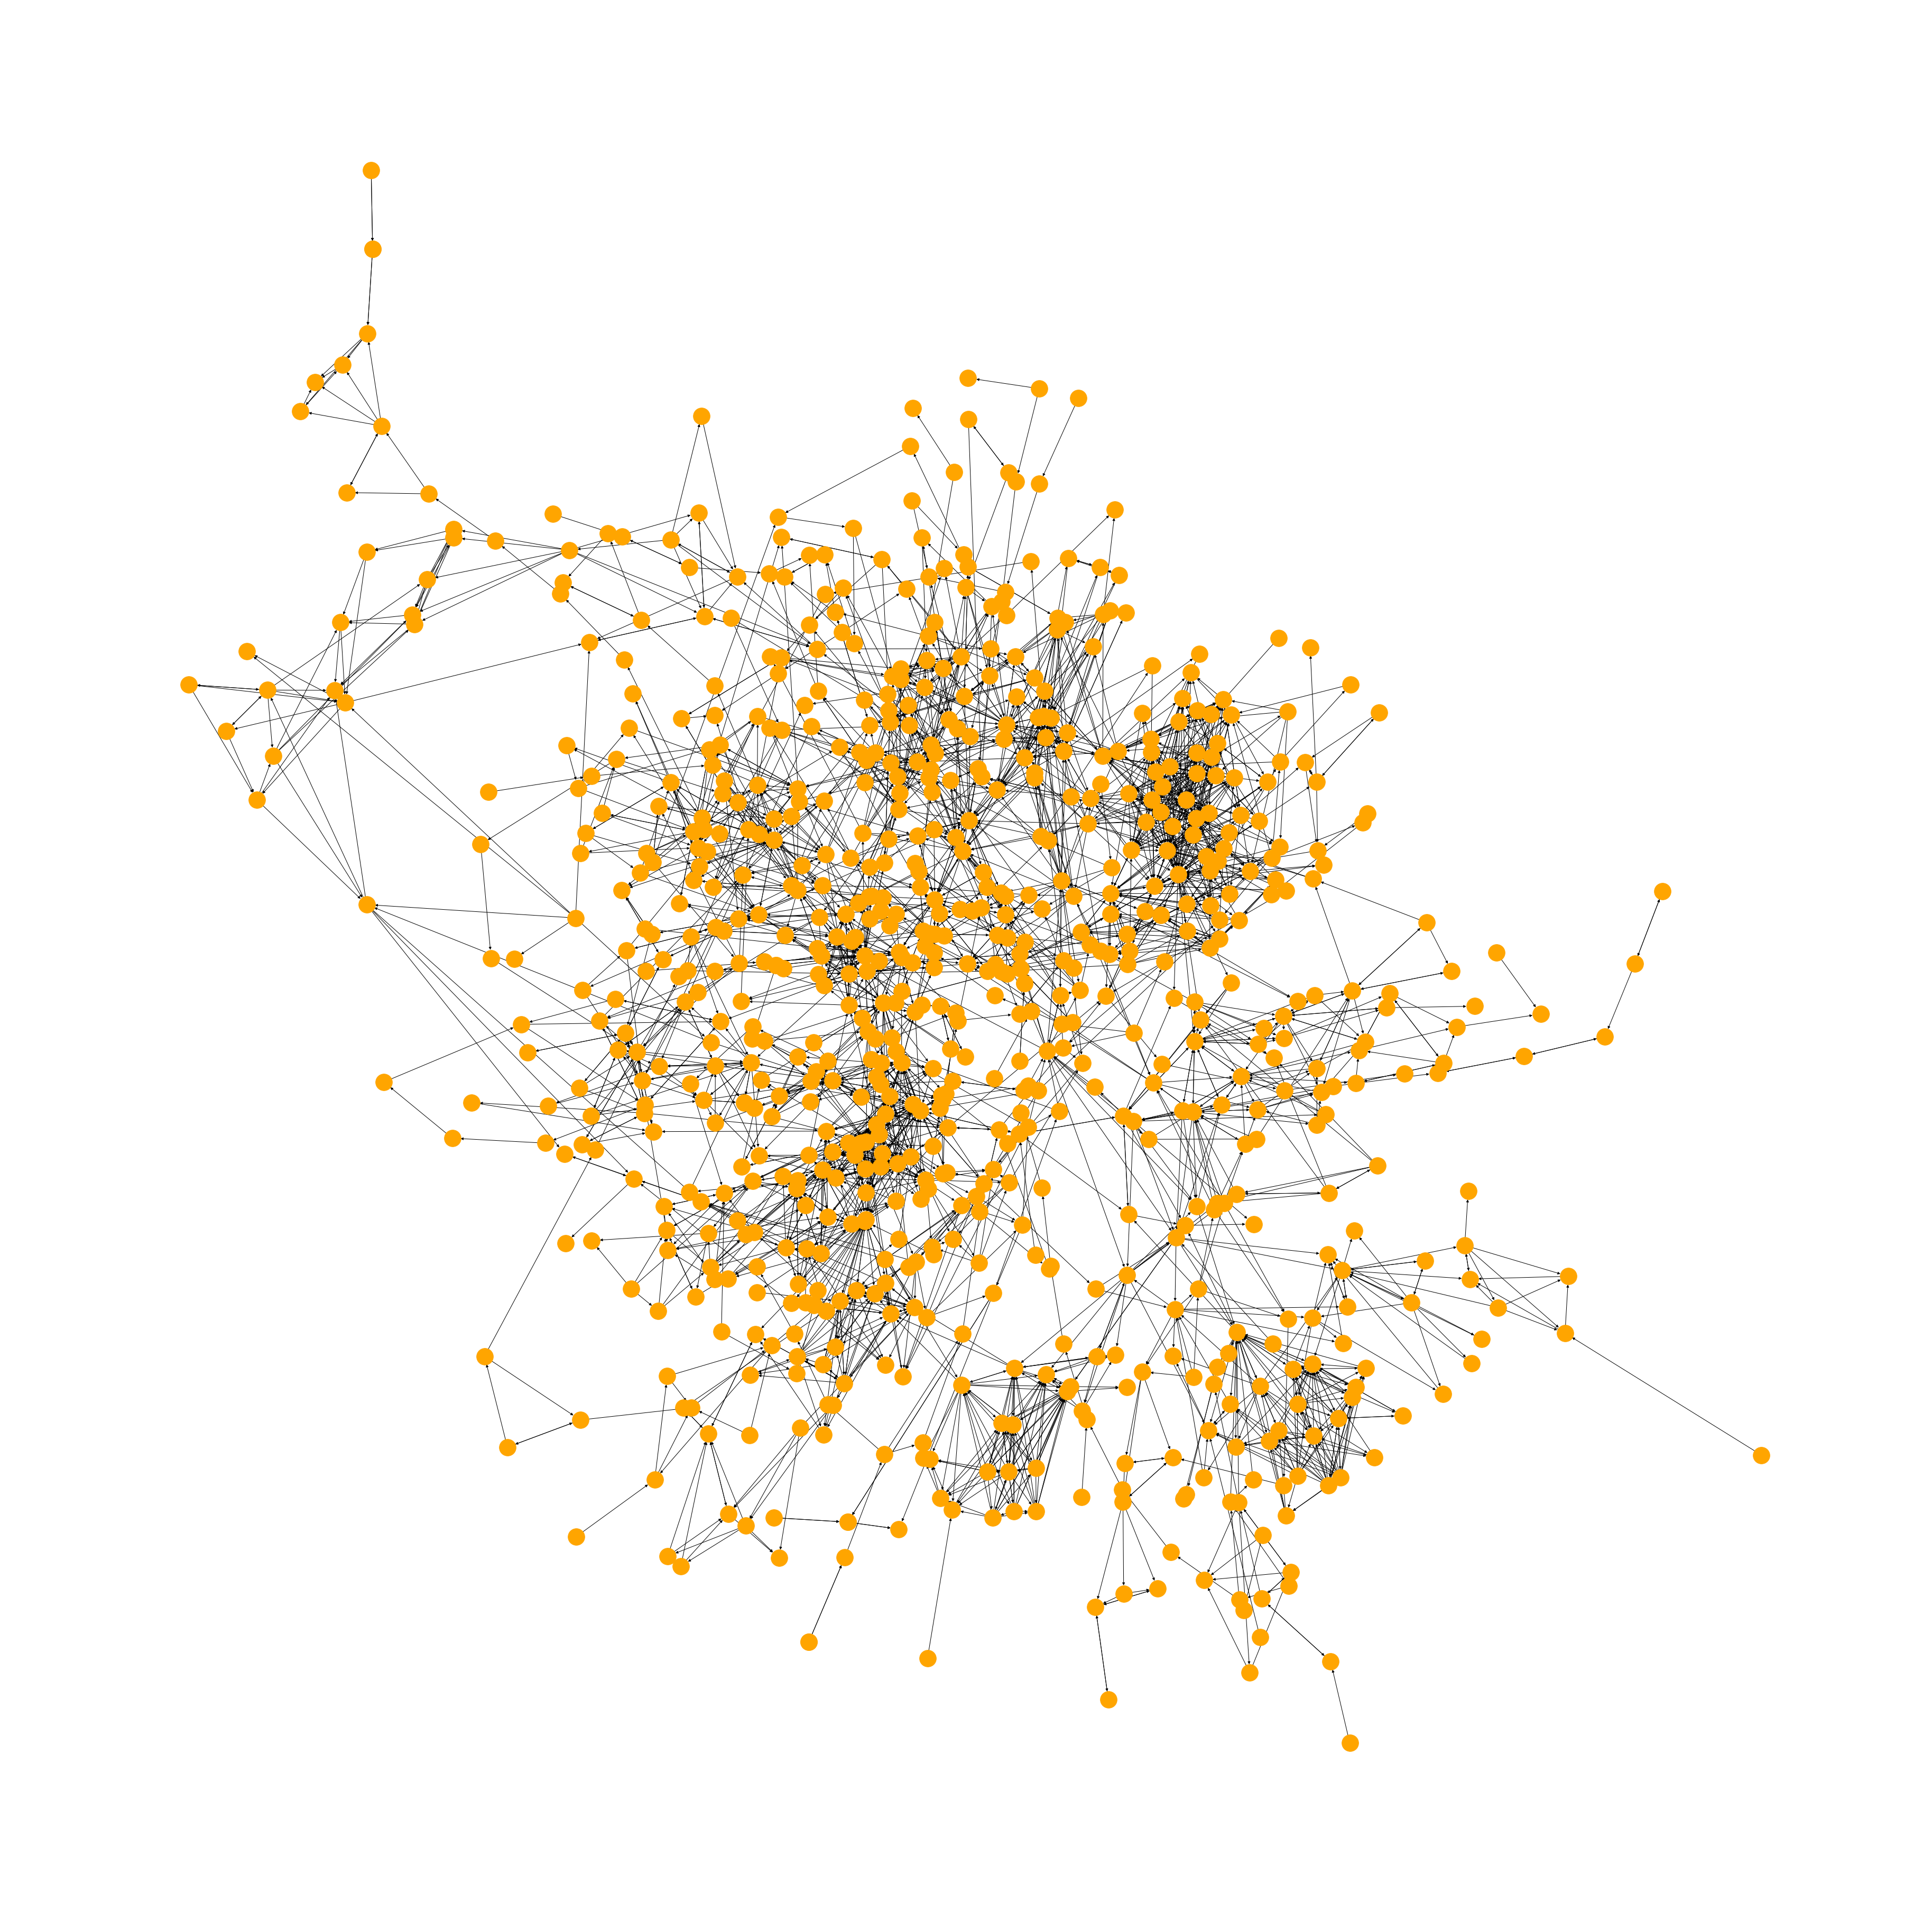

In [33]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
G.add_edges_from(EDGES)


plt.figure(3,figsize=(50,50))
nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange',with_labels=False)
plt.savefig("net_"+org+"1.pdf")# Guardar la red en pdf. 
plt.show()

In [36]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 796
L= 2953


# Analisis

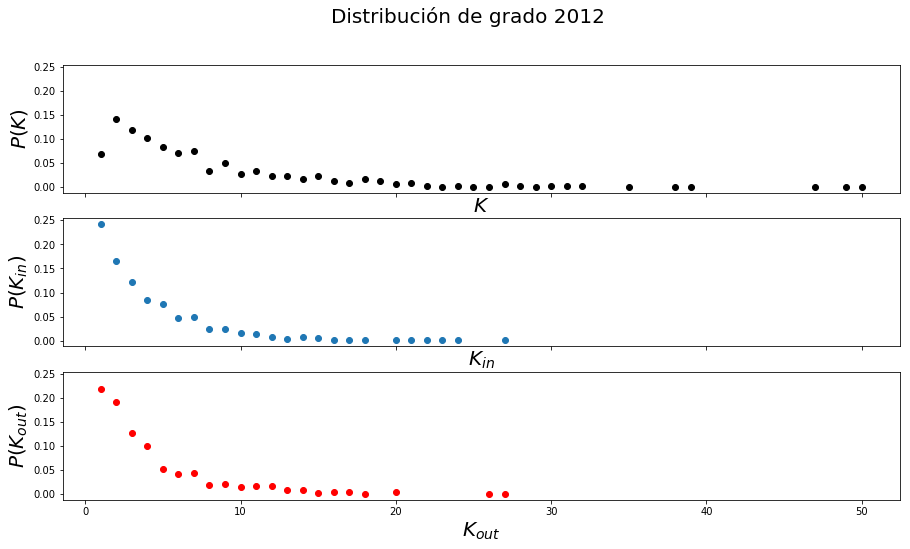

In [37]:
nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)
        
        
        
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

#plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()

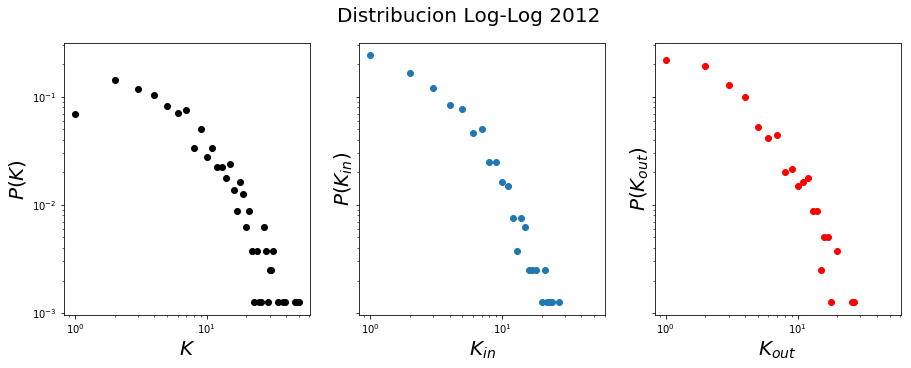

In [38]:

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

#plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

In [39]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])
df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
df.sort_values(by='dif_grado', ascending=False)

Nombre  grado  grado_in  \
652  galactoside 2-L-fucosyltransferase 1/2 [EC:2.4...     21        18   
53               glucuronosyltransferase [EC:2.4.1.17]     32        23   
637                 galactosylceramidase [EC:3.2.1.46]     15        14   
306                  D-amino-acid oxidase [EC:1.4.3.3]     11        11   
274                  L-amino-acid oxidase [EC:1.4.3.2]     29        20   
585  phosphatidylethanolamine/phosphatidyl-N-methyl...     12        11   
226            nucleoside-triphosphatase [EC:3.6.1.15]     12        11   
216  hypoxanthine phosphoribosyltransferase [EC:2.4...     24        17   
653  N-acetyllactosaminide 3-alpha-galactosyltransf...     14        12   
206     adenine phosphoribosyltransferase [EC:2.4.2.7]     21        15   
222                     adenosine kinase [EC:2.7.1.20]     12        10   
397          tryptophan 5-monooxygenase [EC:1.14.16.4]     11         9   
626  prostamide/prostaglandin F2alpha synthase [EC:...      7         7   
619        arachidonate 5-lipoxygenase [EC:1.13.11.34]     17        12   
22               L-lactate dehydrogenase [EC:1.1.1.27]     11         9   
436                glycogen phosphorylase [EC:2.4.1.1]      7         7   
665  galactosylgalactosylglucosylceramide beta-D-ac...     11         9   
586            secretory phospholipase A2 [EC:3.1.1.4]     35        21   
215                   IMP dehydrogenase [EC:1.1.1.205]     15        11   
217                       5'-nucleotidase [EC:3.1.3.5]     47        27   
234  bis(5'-nucleosidyl)-tetraphosphatase [EC:3.6.1...      9         8   
308  kynurenine---oxoglutarate transaminase / cyste...     13        10   
718  nicotinate phosphoribosyltransferase [EC:6.3.4...      7         7   
716  H+-translocating NAD(P) transhydrogenase [EC:1...      7         7   
715                          NAD+ kinase [EC:2.7.1.23]      7         7   
178  testosterone 17beta-dehydrogenase (NADP+) [EC:...      7         7   
394         phenylalanine-4-hydroxylase [EC:1.14.16.1]     12         9   
361            beta-Ala-His dipeptidase [EC:3.4.13.20]     16        11   
202  phosphoribosylamine--glycine ligase / phosphor...     20        13   
646  sphingoid base N-palmitoyltransferase [EC:2.3....     14        10   
..                                                 ...    ...       ...   
713                   NAD+ diphosphatase [EC:3.6.1.22]     12         3   
291  betaine-homocysteine S-methyltransferase [EC:2...      8         1   
325  alanine-glyoxylate transaminase / (R)-3-amino-...      8         1   
552  myo-inositol-1(or 4)-monophosphatase [EC:3.1.3...      6         0   
582        phosphatidylserine synthase 2 [EC:2.7.8.29]      9         1   
631                  ceramide synthetase [EC:2.3.1.24]     13         3   
0                      aldose 1-epimerase [EC:5.1.3.3]     11         2   
635      sphingomyelin phosphodiesterase [EC:3.1.4.12]     11         2   
539  phosphatidylinositol phospholipase C, zeta [EC...      9         1   
645                shingomyelin synthase [EC:2.7.8.27]     11         2   
169           steroid 21-monooxygenase [EC:1.14.14.16]     17         5   
242    cAMP-specific phosphodiesterase 4 [EC:3.1.4.53]     11         2   
240      heat-stable enterotoxin receptor [EC:4.6.1.2]      7         0   
622  cytochrome P450 family 2 subfamily C [EC:1.14....     26         9   
632  sphingolipid 4-desaturase/C4-monooxygenase [EC...     20         6   
248  carbamoyl-phosphate synthase / aspartate carba...     16         4   
625  arachidonate 15-lipoxygenase (second type) / 8...     14         3   
538  diacylglycerol diphosphate phosphatase / phosp...      9         0   
288      glycine hydroxymethyltransferase [EC:2.1.2.1]     31        11   
232  GMP synthase (glutamine-hydrolysing) [EC:6.3.5.2]     15         3   
282  alanine-glyoxylate transaminase / serine-glyox...     23         6   
199            argininosuccinate synthase [EC:6.3.4.5]     11         0  

In [40]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))

                                                  Name  intermediacion
17   aldehyde dehydrogenase family 7 member A1 [EC:...        0.087687
53               glucuronosyltransferase [EC:2.4.1.17]        0.081368
5    phosphoglucomutase / phosphopentomutase [EC:5....        0.066292
245  ectonucleotide pyrophosphatase/phosphodiestera...        0.065574
340                      aldehyde oxidase [EC:1.2.3.1]        0.064775
586            secretory phospholipase A2 [EC:3.1.1.4]        0.055100
77   beta-1,4-galactosyltransferase 1 [EC:2.4.1.22 ...        0.053440
58                    aldehyde reductase [EC:1.1.1.21]        0.049456
18              alcohol dehydrogenase 1/7 [EC:1.1.1.1]        0.049328
183  cytochrome P450 family 2 subfamily E polypepti...        0.048095
55   UTP--glucose-1-phosphate uridylyltransferase [...        0.046629
21                       pyruvate kinase [EC:2.7.1.40]        0.041355
1                              hexokinase [EC:2.7.1.1]        0.038582
74    